In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [13]:
olympic_data=pd.read_csv("winter.csv")

In [14]:
olympic_data.head()

,Year,City,Sport,Discipline,Country,Gender,Event,Medal,Athlete
0,1924,Chamonix,Biathlon,Biathlon,FIN,Men,Military Patrol,Silver,FIN
1,1924,Chamonix,Biathlon,Biathlon,FRA,Men,Military Patrol,Bronze,FRA
2,1924,Chamonix,Biathlon,Biathlon,SUI,Men,Military Patrol,Gold,SUI
3,1924,Chamonix,Bobsleigh,Bobsleigh,BEL,Men,Four-Man,Bronze,BEL
4,1924,Chamonix,Bobsleigh,Bobsleigh,GBR,Men,Four-Man,Silver,GBR


In [15]:
olympic_data.tail()

,Year,City,Sport,Discipline,Country,Gender,Event,Medal,Athlete
3269,2018,PyeongChang,Speed Skating,Speed Skating,KOR,Women,Mass Start,Silver,Kim Bo-Reum
3270,2018,PyeongChang,Speed Skating,Speed Skating,NED,Women,Mass Start,Bronze,Irene Schouten
3271,2018,PyeongChang,Speed Skating,Speed Skating,JPN,Women,Team Pursuit (6 laps),Gold,Japan
3272,2018,PyeongChang,Speed Skating,Speed Skating,NED,Women,Team Pursuit (6 laps),Silver,Netherlands
3273,2018,PyeongChang,Speed Skating,Speed Skating,USA,Women,Team Pursuit (6 laps),Bronze,United States


In [16]:
olympic_data.shape

(3274, 9)

In [17]:
olympic_data.columns

Index(['Year', 'City', 'Sport', 'Discipline', 'Country', 'Gender', 'Event',
       'Medal', 'Athlete'],
      dtype='object')

In [18]:
olympic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3274 entries, 0 to 3273
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        3274 non-null   int64 
 1   City        3274 non-null   object
 2   Sport       3274 non-null   object
 3   Discipline  3274 non-null   object
 4   Country     3274 non-null   object
 5   Gender      3274 non-null   object
 6   Event       3274 non-null   object
 7   Medal       3274 non-null   object
 8   Athlete     3274 non-null   object
dtypes: int64(1), object(8)
memory usage: 230.3+ KB


In [19]:
olympic_data.describe()

,Year
count,3274.000000
mean,1989.351252
std,24.275321
min,1924.000000
25%,1976.000000
50%,1994.000000
75%,2010.000000
max,2018.000000


In [20]:
olympic_data.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Country       0
Gender        0
Event         0
Medal         0
Athlete       0
dtype: int64

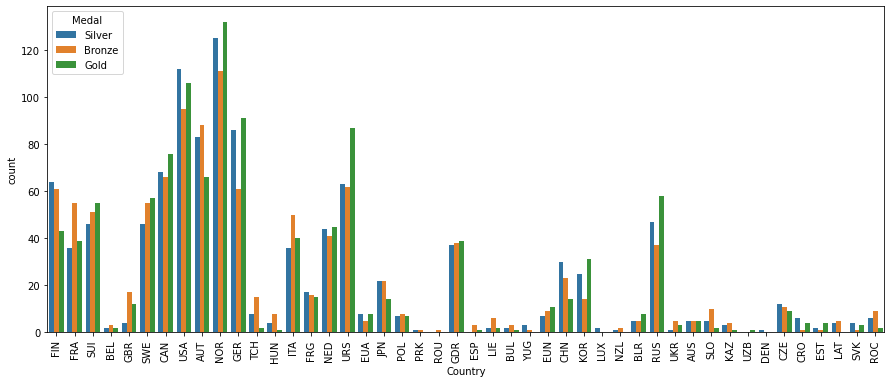

In [21]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'Country', hue = 'Medal', data = olympic_data)
plt.xticks(rotation = 90)
plt.show()

In [25]:
country_medals = olympic_data[['Country', 'Medal']] \
.groupby('Country').count() \
.sort_values('Medal', ascending=False) \
.head(20)

In [23]:
country_medals

,Medal
Country,
NOR,368
USA,313
GER,238
AUT,237
URS,212
...,...
CHN,67
JPN,58
FRG,48


<Figure size 720x432 with 0 Axes>

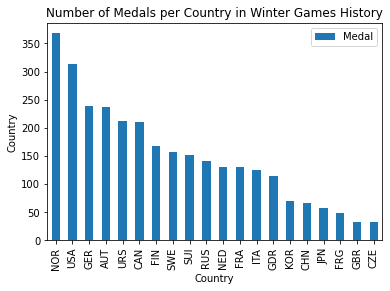

In [24]:
plt.figure(figsize=(10,6))
country_medals.plot(kind='bar')
plt.ylabel('Country')
plt.title('Number of Medals per Country in Winter Games History');

In [26]:
medal_yearwise=olympic_data.groupby('Year')['Medal'].count()

In [27]:
medal_yearwise

Year
1924     52
1928     44
1932     45
1936     54
1948     69
1952     70
1956     74
1960     84
1964    107
1968    107
1972    108
1976    117
1980    121
1984    123
1988    144
1992    177
1994    189
1998    211
2002    239
2006    258
2010    264
2014    310
2018    307
Name: Medal, dtype: int64

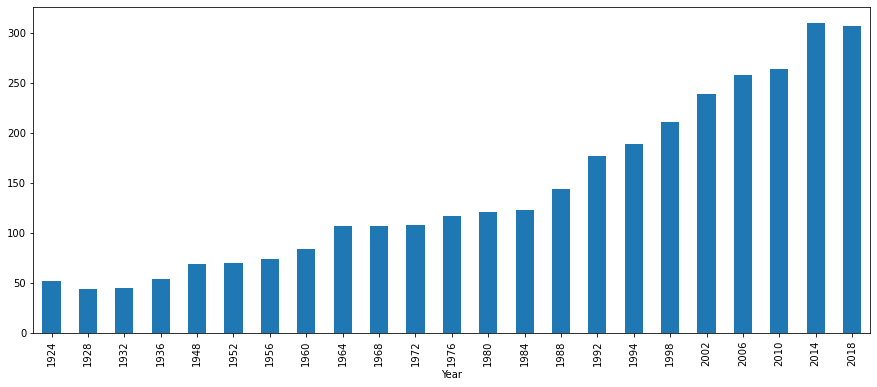

In [28]:
plt.figure(figsize=(15,6))
medal_yearwise.plot(kind='bar')
plt.xticks(rotation = 90)
plt.show()

In [30]:
import plotly.express as px

In [39]:
gold_medal = olympic_data[olympic_data['Medal']=="Gold"] \
            .groupby(["Country"])\
            .count()\
            .sort_values(by='Medal', ascending=False).reset_index()
line_colors = ["red", "blue","green","yellow","orange"]
gold_medal_plot= px.pie(gold_medal.head(5), values='Medal',hole=0.6, names='Country',title= "   Top 5 Gold Winning Nations")
gold_medal_plot.show()

In [40]:
silver_medal = olympic_data[olympic_data['Medal']=="Silver"] \
            .groupby(["Country"])\
            .count()\
            .sort_values(by='Medal', ascending=False).reset_index()
line_colors = ["red", "blue","green","yellow","orange"]
silver_medal_plot= px.pie(silver_medal.head(5), values='Medal',hole=0.6, names='Country',title="Top 5 Silver Winning Nations")
silver_medal_plot.show()

In [41]:
bronze_medal = olympic_data[olympic_data['Medal']=="Bronze"] \
            .groupby(["Country"])\
            .count()\
            .sort_values(by='Medal', ascending=False).reset_index()
line_colors = ["red", "blue","green","yellow","orange"]
bronze_medal_plot= px.pie(bronze_medal.head(5), values='Medal',hole=0.6, names='Country',title="Top 5 Bronze Winning Nations")
bronze_medal_plot.show()

In [42]:
yearly_medal=olympic_data.groupby('Year')['Medal'].value_counts()

In [43]:
yearly_medal

Year  Medal 
1924  Bronze     18
      Gold       17
      Silver     17
1928  Bronze     16
      Gold       15
               ... 
2014  Gold      104
      Silver    102
2018  Gold      103
      Bronze    102
      Silver    102
Name: Medal, Length: 69, dtype: int64

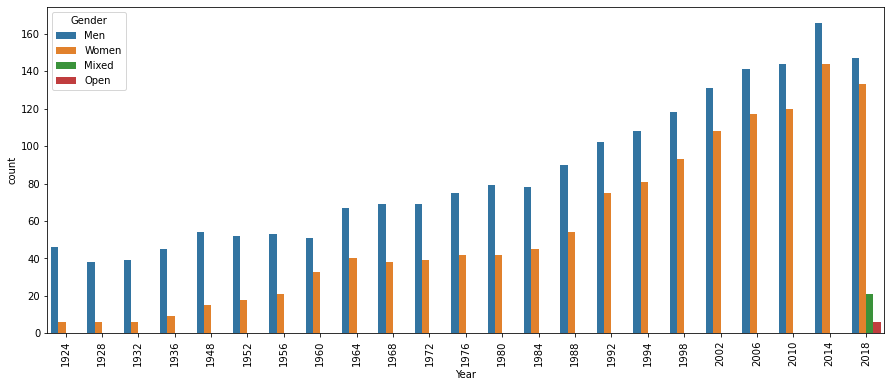

In [44]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'Year', hue = 'Gender', data = olympic_data)
plt.xticks(rotation = 90)
plt.show()

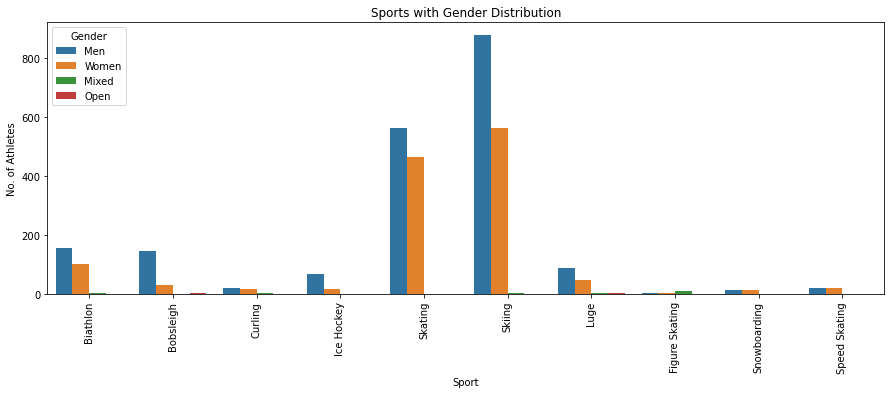

In [45]:
plt.figure(figsize=(15, 5))
sport_by_gender = olympic_data['Sport'].value_counts().index
sns.countplot(x='Sport', hue = 'Gender', data = olympic_data)
plt.xticks(rotation=90)
plt.title('Sports with Gender Distribution')
plt.xlabel('Sport')
plt.ylabel('No. of Athletes');

Text(0.5, 1.0, 'The Variation In Number of Medals over the Years for Norway')

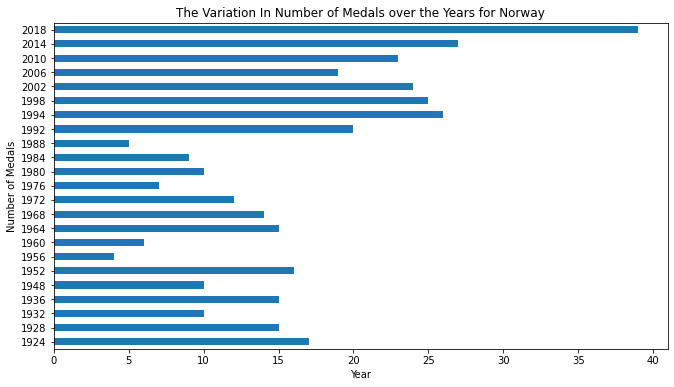

In [46]:
norway_country = olympic_data[olympic_data['Country']=='NOR']
norway_medals_data = norway_country.groupby('Year')['Medal'].count()
norway_medals_data.plot(kind='barh', figsize=(11,6))
plt.ylabel('Number of Medals')
plt.xlabel('Year')
plt.title('The Variation In Number of Medals over the Years for Norway')

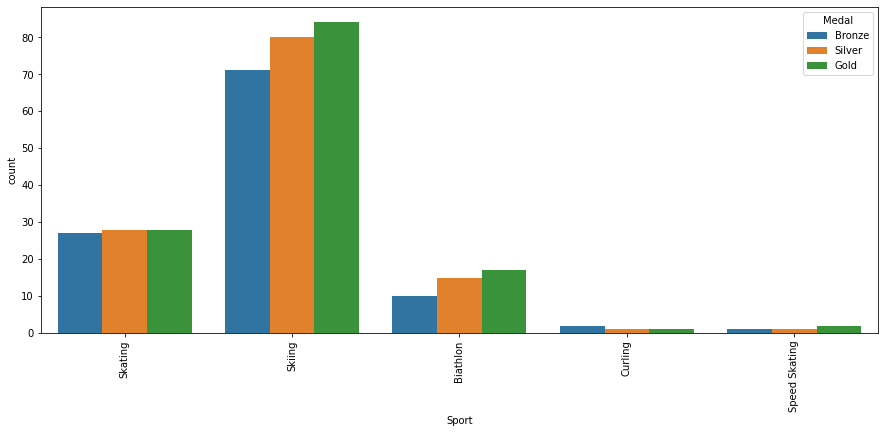

In [47]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'Sport', hue = 'Medal', data = norway_country)
plt.xticks(rotation = 90)
plt.show()

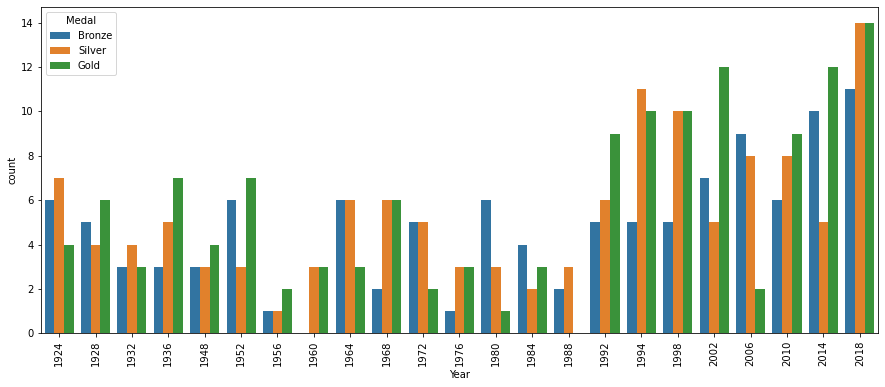

In [48]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'Year', hue = 'Medal', data = norway_country)
plt.xticks(rotation = 90)
plt.show()

In [49]:
country_joined = olympic_data.groupby('Year')['Country'].nunique() \
.reset_index()

In [50]:
country_joined

,Year,Country
0,1924,10
1,1928,12
2,1932,10
3,1936,11
4,1948,13
...,...,...
18,2002,24
19,2006,26
20,2010,26
21,2014,26


In [60]:
fig=px.histogram(country_joined,x='Year',y='Country',title="<b>The Variation In Number over the Years")
fig.show()

In [56]:
discipline_games = olympic_data.groupby('Year')['Discipline'].nunique() \
.reset_index()

In [57]:
discipline_games

,Year,Discipline
0,1924,9
1,1928,8
2,1932,7
3,1936,8
4,1948,9
...,...,...
18,2002,15
19,2006,15
20,2010,15
21,2014,15
